In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pip install gdown
import gdown

# Download file from Drive
file_id = "17rc8ezNVar3eBL0uAixrQXQnqNIlXScD"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Sample_Superstore.csv", quiet=False)

# Load CSV
import pandas as pd
df = pd.read_csv("Sample_Superstore.csv", encoding='latin1')
df.head()


Downloading...
From: https://drive.google.com/uc?id=17rc8ezNVar3eBL0uAixrQXQnqNIlXScD
To: /content/Sample_Superstore.csv
100%|██████████| 2.29M/2.29M [00:00<00:00, 48.8MB/s]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
import pandas as pd

In [24]:
print(df.head())
print(df.columns)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [27]:
#  Convert Order Date to datetime and extract Month/Season
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [28]:
def month_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(month_to_season)


In [29]:
#Profit category
df['Profit_Category'] = pd.cut(df['Profit'], bins=[-10000,0,100,50000], labels=['Loss','Low','High'])


In [31]:
#Top Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top Categories by Sales:\n", top_categories.head())

Top Categories by Sales:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [33]:
#Peak Season by Sales
peak_season = df.groupby('Season')['Sales'].sum().sort_values(ascending=False)
print("\nPeak Season by Sales:\n", peak_season)


Peak Season by Sales:
 Season
Fall      860434.0014
Spring    497796.4291
Winter    479969.5905
Summer    459000.8393
Name: Sales, dtype: float64


In [34]:
#Top Stores (Cities) by Sales
top_stores = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("\nTop Stores (Cities) by Sales:\n", top_stores.head())


Top Stores (Cities) by Sales:
 City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64


In [35]:
#Top Products by Profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)
print("\nTop Products by Profit:\n", top_products.head())


Top Products by Profit:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


In [36]:
#Discount vs Profit
discount_profit = df.groupby('Discount')['Profit'].sum().sort_values(ascending=False)
print("\nDiscount vs Profit:\n", discount_profit)



Discount vs Profit:
 Discount
0.00    320987.6032
0.20     90337.3060
0.10      9029.1770
0.15      1418.9915
0.32     -2391.1377
0.45     -2493.1111
0.60     -5944.6552
0.30    -10369.2774
0.50    -20506.4281
0.40    -23057.0504
0.80    -30539.0392
0.70    -40075.3569
Name: Profit, dtype: float64


In [37]:
df.to_csv("Superstore_Sales_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Superstore_Sales_Cleaned.csv'")



Cleaned dataset saved as 'Superstore_Sales_Cleaned.csv'


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


/tmp/ipython-input-1426305239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


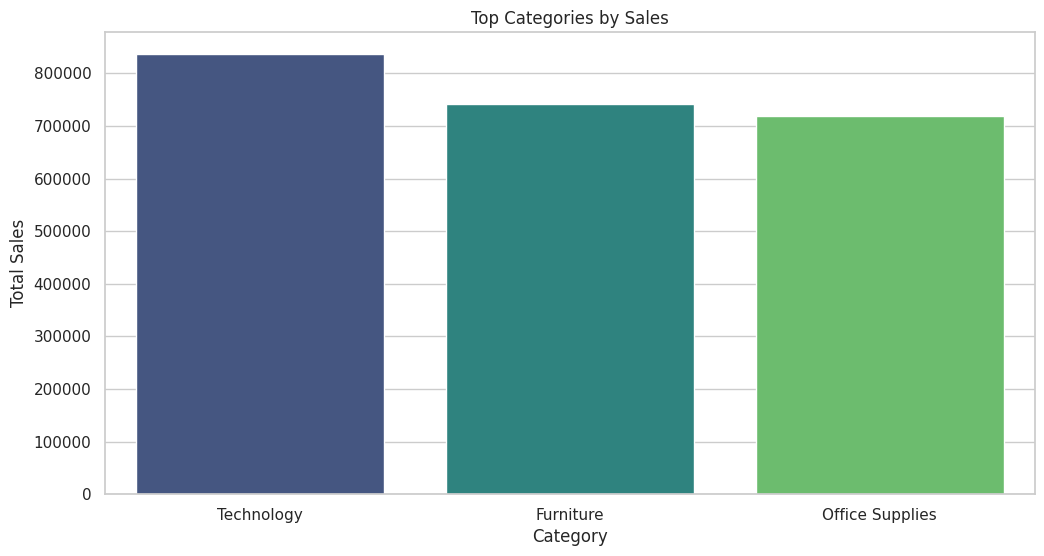

In [39]:
# Top Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top Categories by Sales")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()

/tmp/ipython-input-3300702439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peak_season.index, y=peak_season.values, palette="coolwarm")


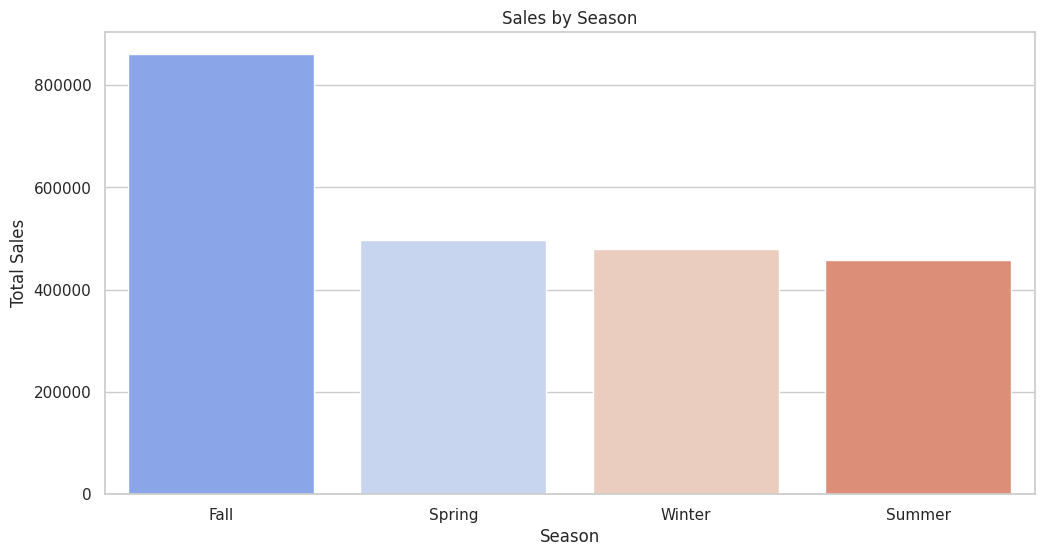

In [40]:
#Peak Season by Sales
peak_season = df.groupby('Season')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=peak_season.index, y=peak_season.values, palette="coolwarm")
plt.title("Sales by Season")
plt.ylabel("Total Sales")
plt.xlabel("Season")
plt.show()


/tmp/ipython-input-246229919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stores.index, x=top_stores.values, palette="magma")


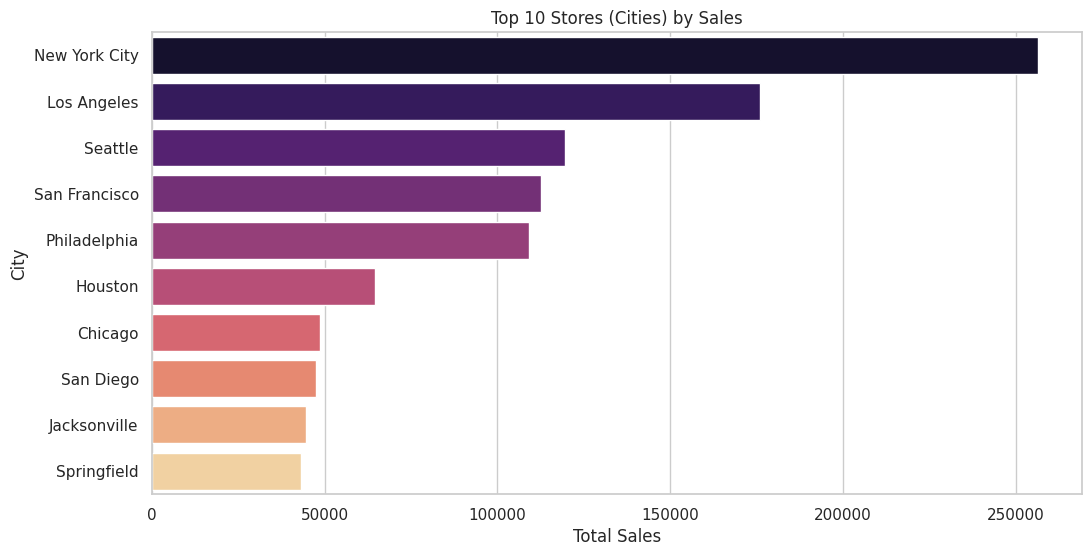

In [41]:
#Top Stores (Cities) by Sales - Top 10
top_stores = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_stores.index, x=top_stores.values, palette="magma")
plt.title("Top 10 Stores (Cities) by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()

/tmp/ipython-input-743698874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="plasma")


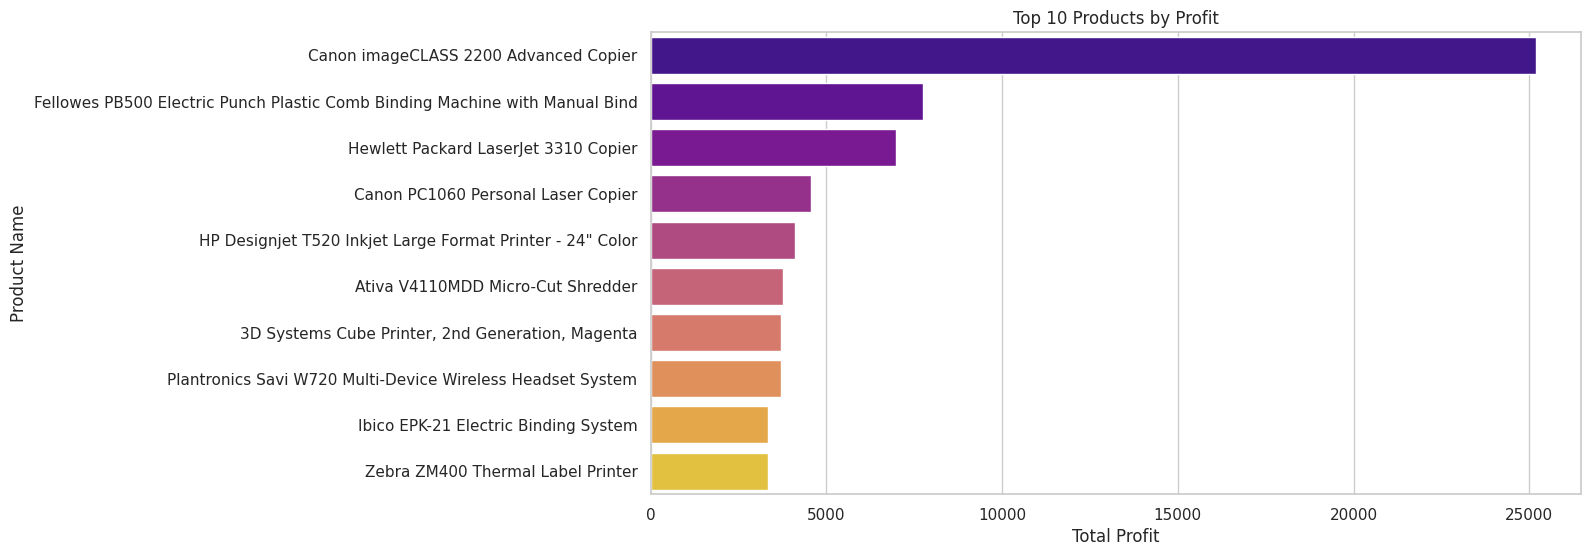

In [42]:
#Top Products by Profit - Top 10
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette="plasma")
plt.title("Top 10 Products by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.show()

/tmp/ipython-input-3840706520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_profit.index, y=discount_profit.values, palette="cividis")


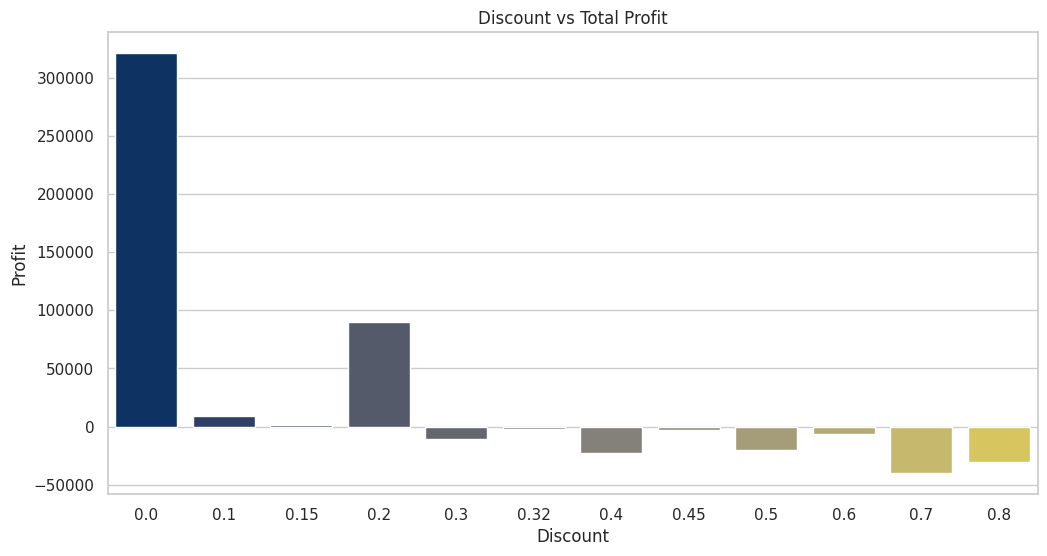

In [43]:
#Discount vs Profit
discount_profit = df.groupby('Discount')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=discount_profit.index, y=discount_profit.values, palette="cividis")
plt.title("Discount vs Total Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

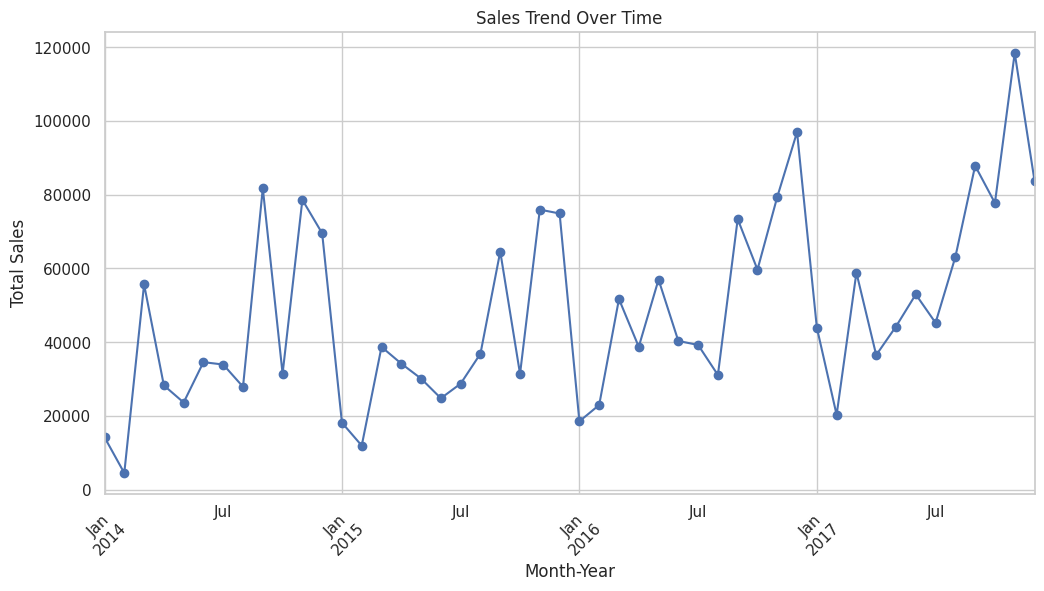

In [44]:
#Sales Trend over Time (Monthly)
df['Month_Year'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Month_Year')['Sales'].sum()
sales_trend.plot(kind='line', marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [45]:
plt.savefig("Top_Categories_Sales.png")  # example for one plot


<Figure size 1200x600 with 0 Axes>

In [46]:
# 1️⃣ Install Plotly (if not installed)
!pip install plotly

import plotly.express as px
import pandas as pd

# 2️⃣ Use your existing cleaned DataFrame
# df = pd.read_csv("Superstore_Cleaned.csv", encoding='latin1')  # if loading again

# 3️⃣ Top Categories by Sales - Interactive Bar Chart
top_categories = df.groupby('Category')['Sales'].sum().reset_index()
fig1 = px.bar(top_categories, x='Category', y='Sales',
              title='Top Categories by Sales',
              color='Sales', color_continuous_scale='Viridis')
fig1.show()

# 4️⃣ Sales by Season - Interactive Bar Chart
season_sales = df.groupby('Season')['Sales'].sum().reset_index()
fig2 = px.bar(season_sales, x='Season', y='Sales',
              title='Sales by Season',
              color='Sales', color_continuous_scale='Cividis')
fig2.show()

# 5️⃣ Top Stores (Cities) by Sales - Interactive Bar Chart (Top 10)
top_stores = df.groupby('City')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)
fig3 = px.bar(top_stores, x='City', y='Sales',
              title='Top 10 Cities by Sales',
              color='Sales', color_continuous_scale='Plasma')
fig3.show()

# 6️⃣ Top Products by Profit - Interactive Bar Chart (Top 10)
top_products = df.groupby('Product Name')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10)
fig4 = px.bar(top_products, x='Product Name', y='Profit',
              title='Top 10 Products by Profit',
              color='Profit', color_continuous_scale='Magma')
fig4.update_xaxes(tickangle=45)
fig4.show()

# 7️⃣ Sales Trend Over Time - Interactive Line Chart
df['Month_Year'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Month_Year')['Sales'].sum().reset_index()
sales_trend['Month_Year'] = sales_trend['Month_Year'].astype(str)

fig5 = px.line(sales_trend, x='Month_Year', y='Sales',
               title='Sales Trend Over Time',
               markers=True)
fig5.update_xaxes(tickangle=45)
fig5.show()

# 8️⃣ Discount vs Profit - Interactive Scatter Plot
fig6 = px.scatter(df, x='Discount', y='Profit', size='Sales', color='Category',
                  hover_data=['Product Name', 'City'],
                  title='Discount vs Profit by Sales & Category')
fig6.show()


In [ ]:
#Dashboard

In [48]:
!pip install streamlit



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.2 MB/s eta 0:00:00


In [51]:
# Install gdown (if not already)
!pip install gdown

import gdown

# File ID from your link:
file_id = "17rc8ezNVar3eBL0uAixrQXQnqNIlXScD"

# Construct download URL and download file
url = f"https://drive.google.com/uc?id={file_id}"
output = "Sample-Superstore.csv"
gdown.download(url, output, quiet=False)

# Then load it with pandas
import pandas as pd
df = pd.read_csv(output, encoding='latin1')
df.head()



Downloading...
From: https://drive.google.com/uc?id=17rc8ezNVar3eBL0uAixrQXQnqNIlXScD
To: /content/Sample-Superstore.csv
100%|██████████| 2.29M/2.29M [00:00<00:00, 149MB/s]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [54]:
# superstore_dashboard.py

import pandas as pd
import plotly.express as px
import streamlit as st
import gdown

# -----------------------------
# 1️⃣ Download the CSV (optional)
file_id = "17rc8ezNVar3eBL0uAixrQXQnqNIlXScD"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Sample-Superstore.csv"
gdown.download(url, output, quiet=True)

# 2️⃣ Load data
df = pd.read_csv(output, encoding='latin1')

# 3️⃣ Preprocess dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.to_period('M')
df['Month_Year'] = df['Month_Year'].astype(str)

# -----------------------------
# Streamlit dashboard
st.title("Superstore Sales Dashboard")

st.markdown("### Quick Insights")
st.write("Dataset shape:", df.shape)
st.write("Columns:", df.columns.tolist())

# -----------------------------
# Top Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().reset_index()
fig1 = px.bar(top_categories, x='Category', y='Sales', color='Sales',
              title='Top Categories by Sales', color_continuous_scale='Viridis')
st.plotly_chart(fig1)

# -----------------------------
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
fig2 = px.bar(region_sales, x='Region', y='Sales', color='Sales',
              title='Sales by Region', color_continuous_scale='Cividis')
st.plotly_chart(fig2)

# -----------------------------
# Top Cities by Sales (Top 10)
top_cities = df.groupby('City')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)
fig3 = px.bar(top_cities, x='City', y='Sales', color='Sales',
              title='Top 10 Cities by Sales', color_continuous_scale='Plasma')
st.plotly_chart(fig3)

# -----------------------------
# Top Products by Profit (Top 10)
top_products = df.groupby('Product Name')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10)
fig4 = px.bar(top_products, x='Product Name', y='Profit', color='Profit',
              title='Top 10 Products by Profit', color_continuous_scale='Magma')
fig4.update_xaxes(tickangle=45)
st.plotly_chart(fig4)

# -----------------------------
# Sales Trend Over Time
sales_trend = df.groupby('Month_Year')['Sales'].sum().reset_index()
fig5 = px.line(sales_trend, x='Month_Year', y='Sales', title='Sales Trend Over Time', markers=True)
fig5.update_xaxes(tickangle=45)
st.plotly_chart(fig5)

# -----------------------------
# Discount vs Profit Scatter
fig6 = px.scatter(df, x='Discount', y='Profit', size='Sales', color='Category',
                  hover_data=['Product Name', 'City'], title='Discount vs Profit by Sales & Category')
st.plotly_chart(fig6)


2025-12-03 04:09:50.364 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.665 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-03 04:09:50.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:09:50.673 Thread 'MainThread': mi

DeltaGenerator()

In [55]:
pip install pandas plotly streamlit gdown


SyntaxError: invalid syntax (ipython-input-605257551.py, line 1)

In [64]:
import pandas as pd

df = pd.read_csv("Sample_Superstore.csv", encoding='latin1')



In [66]:
import pandas as pd

df = pd.read_csv("Sample-Superstore.csv", encoding='latin1')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [71]:
# -----------------------------
# Sales Trend Over Time (Monthly)
# -----------------------------
st.subheader("Sales Trend Over Time")

# Make sure Month exists in filtered_df
filtered_df['Month'] = filtered_df['Order Date'].dt.to_period('M')

# Aggregate sales by Month
sales_time = filtered_df.groupby('Month')['Sales'].sum().reset_index()
sales_time['Month'] = sales_time['Month'].dt.to_timestamp()

fig3 = px.line(sales_time, x='Month', y='Sales', title="Monthly Sales Trend", height=400)
st.plotly_chart(fig3, width='stretch')  # updated per Streamlit 1.25+


2025-12-03 04:55:04.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:04.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [72]:
# -----------------------------
# Filters
# -----------------------------
region_filter = st.selectbox("Select Region", ["All"] + list(df['Region'].unique()))
category_filter = st.selectbox("Select Category", ["All"] + list(df['Category'].unique()))
subcat_filter = st.selectbox("Select Sub-Category", ["All"] + list(df['Sub-Category'].unique()))

# Make a proper copy after filtering
filtered_df = df.copy()
if region_filter != "All":
    filtered_df = filtered_df[filtered_df['Region'] == region_filter].copy()
if category_filter != "All":
    filtered_df = filtered_df[filtered_df['Category'] == category_filter].copy()
if subcat_filter != "All":
    filtered_df = filtered_df[filtered_df['Sub-Category'] == subcat_filter].copy()

# -----------------------------
# Sales Trend Over Time (Monthly)
# -----------------------------
st.subheader("Sales Trend Over Time")

# Safely add Month column
filtered_df = filtered_df.copy()  # ensures we can add columns
filtered_df['Month'] = pd.to_datetime(filtered_df['Order Date']).dt.to_period('M')

# Aggregate sales by Month
sales_time = filtered_df.groupby('Month')['Sales'].sum().reset_index()
sales_time['Month'] = sales_time['Month'].dt.to_timestamp()

fig3 = px.line(sales_time, x='Month', y='Sales', title="Monthly Sales Trend", height=400)
st.plotly_chart(fig3, width='stretch')


2025-12-03 04:55:33.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:55:33.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [74]:
st.subheader("Key Metrics")
total_sales = filtered_df['Sales'].sum()
total_profit = filtered_df['Profit'].sum()
total_orders = filtered_df['Order ID'].nunique()

col1, col2, col3 = st.columns(3)
col1.metric("Total Sales", f"${total_sales:,.2f}")
col2.metric("Total Profit", f"${total_profit:,.2f}")
col3.metric("Total Orders", total_orders)


2025-12-03 04:56:10.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:10.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [75]:
st.subheader("Sales by Category")
category_sales = filtered_df.groupby('Category')['Sales'].sum().reset_index()
fig1 = px.bar(category_sales, x='Category', y='Sales', title="Sales by Category", height=400)
st.plotly_chart(fig1, width='stretch')

st.subheader("Sales by Sub-Category")
subcat_sales = filtered_df.groupby('Sub-Category')['Sales'].sum().reset_index()
fig2 = px.bar(subcat_sales, x='Sub-Category', y='Sales', title="Sales by Sub-Category", height=400)
st.plotly_chart(fig2, width='stretch')


2025-12-03 04:56:19.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:19.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [76]:
st.subheader("Sales vs Profit")
fig4 = px.scatter(filtered_df, x='Sales', y='Profit', color='Category',
                  hover_data=['Sub-Category', 'Region'], height=400)
st.plotly_chart(fig4, width='stretch')


2025-12-03 04:56:30.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:30.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:30.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:31.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:31.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:31.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:31.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 04:56:31.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()